In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [79]:
# Define path to the data directory
data_dir = Path('d:/Effusion_T/train/')

data_dir

WindowsPath('d:/Effusion_T/train')

In [80]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / 'Normal_1'
Tuberculosis_cases_dir = data_dir / 'Effusion_1'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,d:\Effusion_T\train\Normal_1\1.2.276.0.7230010...,0
1,d:\Effusion_T\train\Effusion_1\00027894_001_eq...,1
2,d:\Effusion_T\train\Normal_1\1.2.276.0.7230010...,0
3,d:\Effusion_T\train\Effusion_1\00026828_025_eq...,1
4,d:\Effusion_T\train\Normal_1\1.2.276.0.7230010...,0


In [81]:
train_data.shape

(3128, 2)

0    1955
1    1173
Name: label, dtype: int64


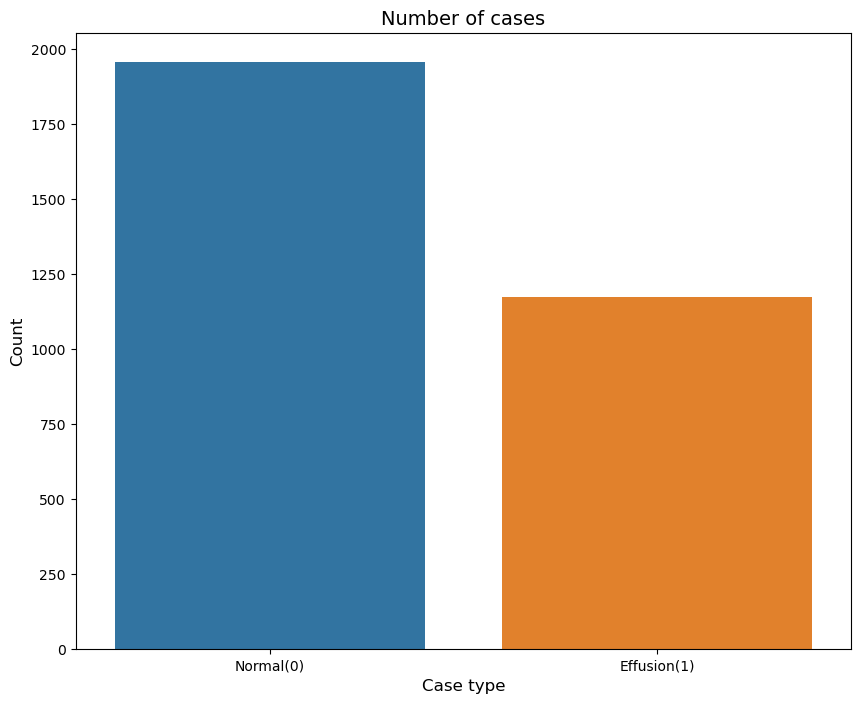

In [82]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Effusion(1)'])
plt.show()

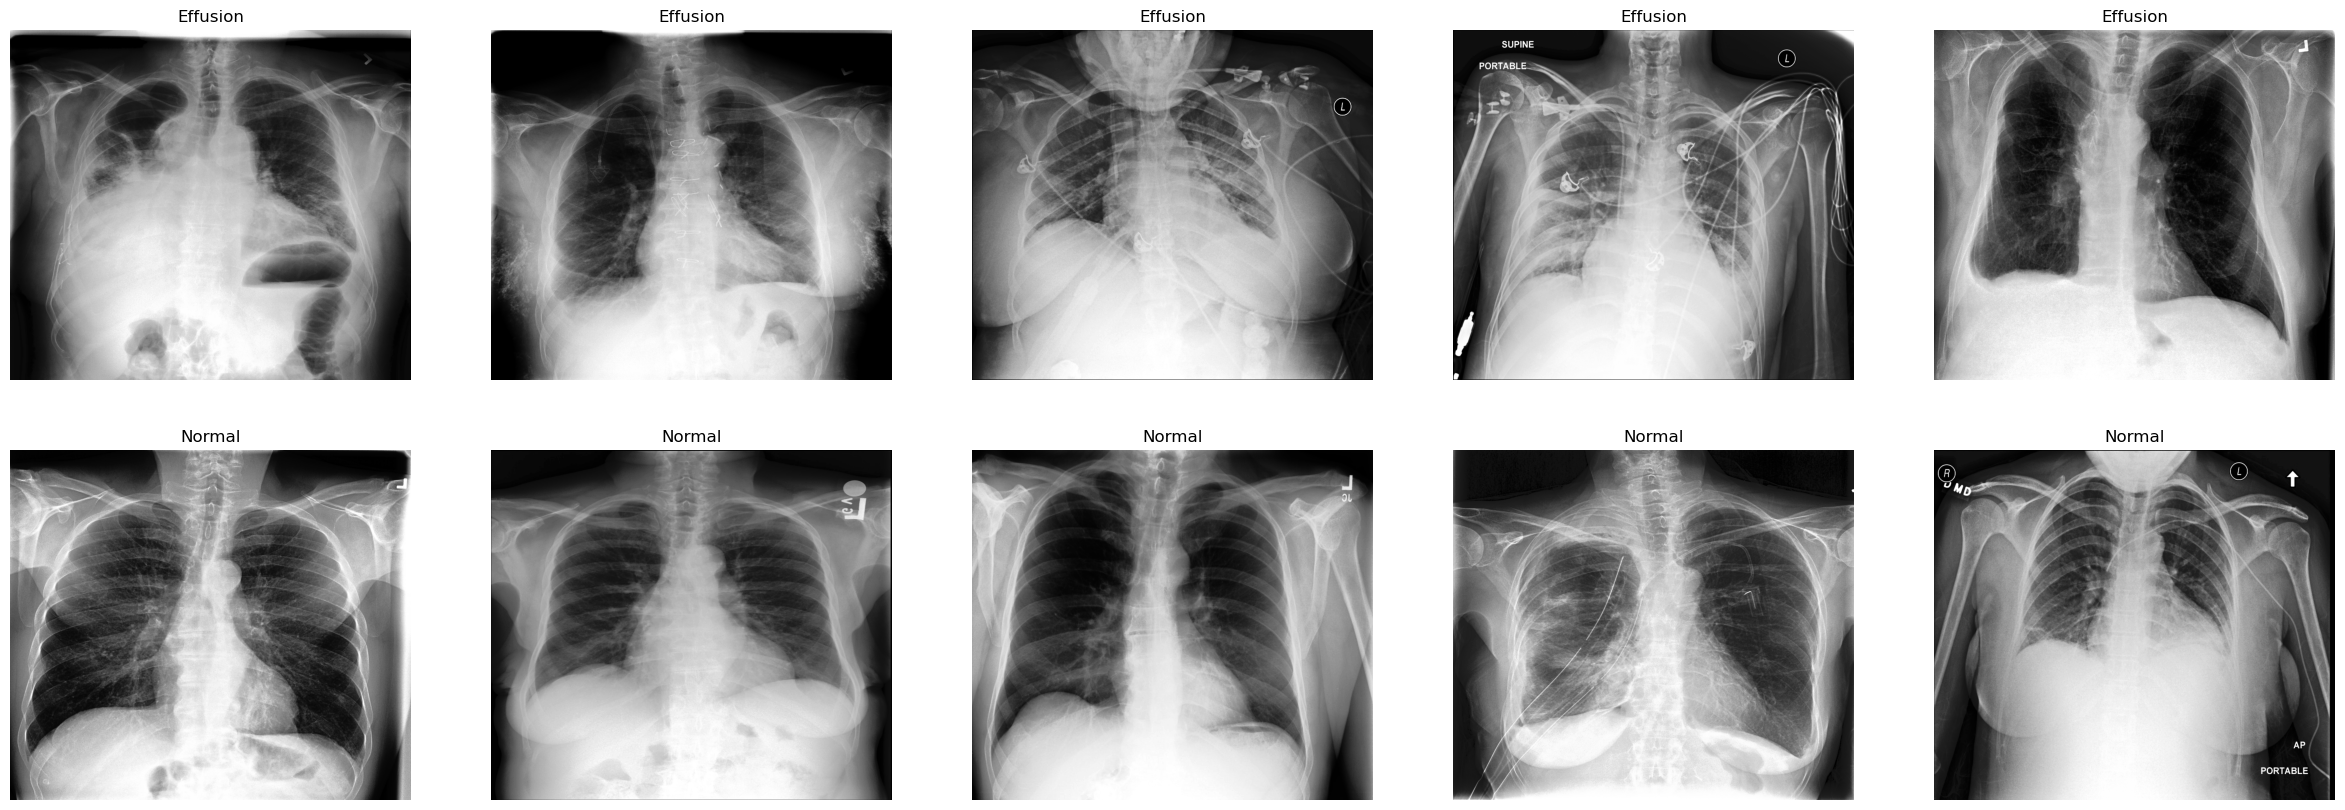

In [83]:
# Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Effusion")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [84]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Effusion'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Effusion'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

1955it [00:21, 90.69it/s]
1173it [00:12, 90.53it/s]

Total number of validation examples:  (3128, 28, 28, 3)
Total number of labels: (3128,)


In [85]:
train_data1[1]

array([[[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.01568627, 0.01568627, 0.01568627],
        [0.11372549, 0.11372549, 0.11372549],
        ...,
        [0.10196078, 0.10196078, 0.10196078],
        [0.10588235, 0.10588235, 0.10588235],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.14117647, 0.14117647, 0.14117647],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.09019608, 0.09019608, 0.09019608],
        [0.09019608, 0.09019608, 0.09019608],
        [0.12941176, 0.12941176, 0.12941176]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.10196078, 0.10196078, 0.10196078],
        [0.10588235, 0.10588235, 0.10588235],
        [0.1254902 , 0.1254902 , 0.1254902 ]],

       ...,

       [[0.29019608, 0.29019608, 0.29019608],
        [0.58823529, 0.58823529, 0.58823529],
        [0.74117647, 0

In [86]:
train_labels1.shape

(3128,)

In [87]:
train_data1.shape

(3128, 28, 28, 3)

In [88]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [89]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Effusion':1})
train_labels1['label'].unique()

array([0, 1], dtype=int64)

In [90]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    1955
1    1955
Name: label, dtype: int64


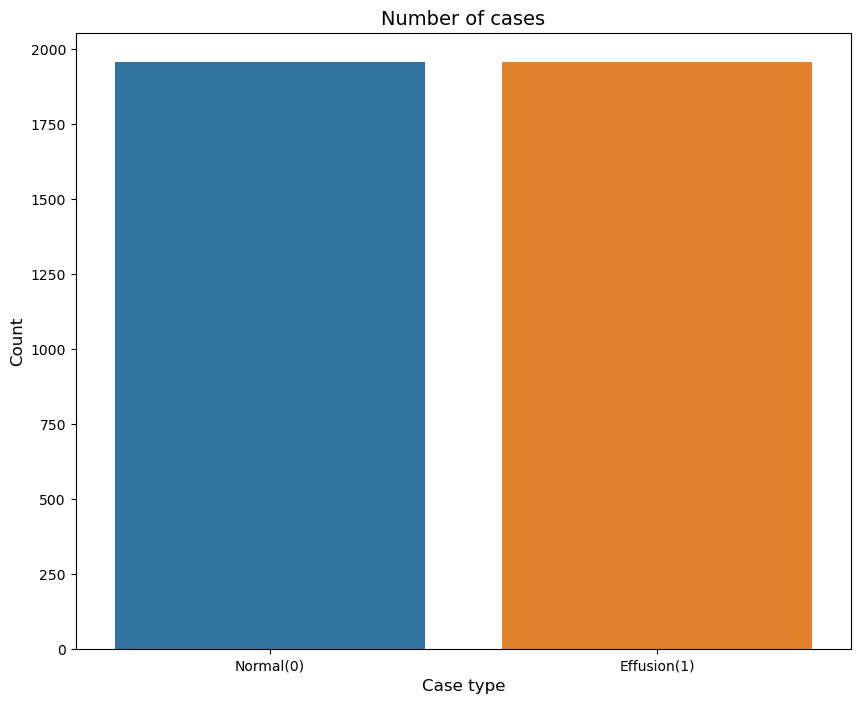

In [92]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Effusion(1)'])
plt.show()

In [93]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [96]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 28, 28, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)         

In [97]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 28, 28, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)         

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=200, validation_data=(np.array(X_test), np.array(y_test)))
# model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/200
107/107 [==============================] - 5s 32ms/step - loss: 0.6983 - accuracy: 0.5254 - val_loss: 0.6888 - val_accuracy: 0.5029
Epoch 2/200
107/107 [==============================] - 3s 30ms/step - loss: 0.6825 - accuracy: 0.5701 - val_loss: 0.6805 - val_accuracy: 0.5678
Epoch 3/200
107/107 [==============================] - 3s 31ms/step - loss: 0.6705 - accuracy: 0.5813 - val_loss: 0.6291 - val_accuracy: 0.6464
Epoch 4/200
107/107 [==============================] - 3s 31ms/step - loss: 0.6561 - accuracy: 0.6192 - val_loss: 0.6347 - val_accuracy: 0.6346
Epoch 5/200
107/107 [==============================] - 3s 30ms/step - loss: 0.6458 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6503
Epoch 6/200
107/107 [==============================] - 3s 30ms/step - loss: 0.6497 - accuracy: 0.6239 - val_loss: 0.6787 - val_accuracy: 0.5226
Epoch 7/200
107/107 [==============================] - 3s 30ms/step - loss: 0.6515 - accuracy: 0.6172 - val_loss: 0.6278 - val_accuracy:

In [100]:
train_labels2['label'].unique()

array([0, 1], dtype=int64)

In [139]:
test_data = []
image='d:/Effusion_T/train/Effusion_1/00021796_011_equalized.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [140]:
test_data1.shape

(1, 28, 28, 3)

In [141]:
a=model.predict(test_data1)
if a[0][0]> a[0][1]:
    print('Normal')
else:
    print('Effusion')

1/1 [==============================] - 0s 22ms/step
Effusion


In [129]:
model.save('d:/Effusion_model.h5')